In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib as mpl
import math
import re
import os
from colour import Color
from cycler import cycler
from IPython.core.display import display, HTML

In [2]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': False})
sns.set_style('whitegrid')

In [3]:
year = 2018
event = 'dh'
gender = 'm'
topX = 18
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [4]:
from config import races

In [5]:
dfs = {}
for race in races[year]:
    racename = races[year][race]['name']
    raceName = races[year][race]['title']

    directory = event + str(race) + '_' + racename
    if os.path.exists(directory):
        file_prefix = event + str(race) + '_' + racename + '_' + gender
        file_prefix = os.path.join( directory, file_prefix )

        dfs[race] = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )

In [6]:
chart_title_prefix = str(year) + ' Season, ' + ( 'Men' if gender == 'm' else 'Women' )

In [7]:
def formatDelta( time ):
    return ':'.join(str(time).split(':')[1:3])[:-3]

In [8]:
def convertToDelta( timestring ):
    timestring = str(timestring)

    if ":" not in timestring:
        timestring = str( cRound( timestring ) )
        timestring = "0:" + timestring

    timestring = "0:" + timestring

    return pd.to_timedelta( timestring )

In [9]:
def cRound( flt ):
    return float( Decimal( flt ).quantize( Decimal('.001' ), rounding=ROUND_HALF_UP ) )

In [10]:
def secondsToRaceTime( seconds ):
    return '%2dm%02ds' % divmod( seconds, 60 )

In [11]:
def colorList( col1, col2, cnt, pos1=0, pos2=1, pos3=2 ):
    clrs = list( Color( col1 ).range_to( Color( col2 ) , cnt ) )
    clrs = [ i.web for i in clrs ]
    if pos1 < cnt:
        clrs[pos1] = 'gold'
    if pos2 < cnt:
        clrs[pos2] = 'silver'
    if pos3 < cnt:
        clrs[pos3] = 'peru'

    return clrs

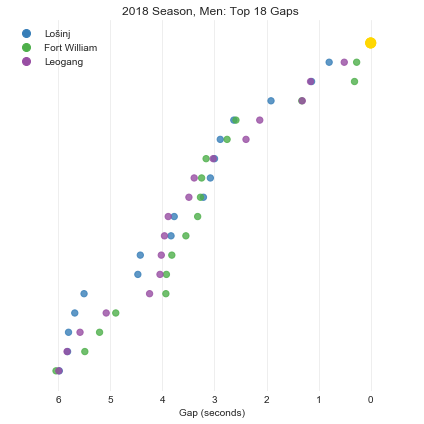

In [12]:
df = dfs[1]
legs = {}
col = 'split5_vs_winner'
title = chart_title_prefix + ': Top ' + str(topX) + ' Gaps '
timeCol = False
xlabel = 'Gap (seconds)'
labelPosOffsetX = .1
minX = False
maxX = False

pltY = 3 * math.ceil( topX / 10 )
pltX = 2.5 * math.ceil( topX / 10 )+1
plt.subplots(figsize=(pltX,pltY))
#     plt.subplots()

if False == minX:
    minX = df[col][:topX].max()+1
if False == maxX:
    maxX = -.9


for race in dfs:
#     http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
    color = Color(rgb=sns.color_palette("Set1", 10)[race]).web
    colors = [color]*(len(df[col]))
    colors[int(df.loc[df['rank'] == 1].index.values)] = "gold"
    sizes = [40]*(len(df[col]))
    sizes[int(df.loc[df['rank'] == 1].index.values)] = 100

    # Build the chart
    plot = sns.regplot( y=dfs[race].index.values[0:topX], x=dfs[race][col][0:topX], fit_reg=False, scatter_kws={'color': colors, 's': sizes} )

    legs[race] = mlines.Line2D( [], [], color=color, marker='o', markersize=8, label=races[year][race]['title'], linestyle='' )


plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( minX, maxX )

# Format the chart
sns.despine()
plot.yaxis.set_visible(False)
plot.set_frame_on(False)
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( title=title, xlabel=xlabel )


plt.legend( handles=list(legs.values()) )
        
plt.tight_layout()

# xticks = [ secondsToRaceTime( int(t.get_text()) ) if 'm' not in t.get_text() else t.get_text() for t in plot.get_xticklabels() ]
# plot.set_xticklabels( xticks )

if image_gen:
#     plt.gcf().subplots_adjust(left=0.3)
    plt.savefig( file_prefix + '_top_' + str(topX) + '_gaps.png', dpi=dpi )

In [13]:
dfs[3].head()

,bib,id,name,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age
0,3,1003,PIERRON Amaury,3,47.141,83.873,122.846,165.982,196.528,3,156,Finished,10008827283,30.0,200.0,1.0,45.256,80.744,118.416,160.917,190.991,60.0,3.0,Finished,230.0,-5.537,11.0,1.123,0.000,10.0,0.908,0.000,36.732,6.0,0.593,0.000,7.0,0.996,0.000,38.973,7.0,0.500,0.000,4.0,0.931,0.000,43.136,2.0,0.383,0.000,3.0,0.638,0.000,30.546,2.0,0.106,0.000,1.0,0.000,0.000,2.0,0.278,0.000,35.488,5.0,0.547,0.000,3.0,0.059,0.000,37.672,3.0,0.461,0.000,1.0,0.000,0.000,42.501,2.0,0.043,0.000,1.0,0.000,0.000,30.074,2.0,0.046,0.000,57.643,57.157,16.011944,0.633056,10.0,5.0,1996-03-04T00:00:00,ME,PIERRON,Amaury,1197024565271555,FRA,NaN,PIERRON Amaury,0,3,PIERRON A,3,50460000,FRA19960304,6,10008827283,CVN,1590,COMMENCAL / VALLNORD,3,22
1,1,1001,GWIN Aaron,13,48.361,85.469,124.547,169.081,200.424,1,158,Finished,10006516663,12.0,160.0,2.0,45.525,80.466,118.357,161.112,191.499,52.0,11.0,Finished,172.0,-8.925,41.0,2.343,1.220,22.0,2.504,1.596,37.108,16.0,0.969,0.376,12.0,2.697,1.701,39.078,8.0,0.605,0.105,13.0,4.030,3.099,44.534,20.0,1.781,1.398,13.0,4.534,3.896,31.343,20.0,0.903,0.797,3.0,0.269,0.269,1.0,0.000,-0.278,34.941,1.0,0.000,-0.547,1.0,0.000,-0.059,37.891,5.0,0.680,0.219,2.0,0.195,0.195,42.755,4.0,0.297,0.254,2.0,0.508,0.508,30.387,9.0,0.359,0.313,58.566,57.715,16.268333,0.376667,3.0,4.0,1987-12-24T00:00:00,ME,GWIN,Aaron,1197024565271553,USA,WCL,GWIN Aaron,0,1,GWIN A,1,50400000,USA19871224,1,10006516663,YTM,1531,THE YT MOB,1,30
2,10,1010,GREENLAND Laurie,6,46.532,83.007,122.780,166.467,197.595,10,149,Finished,10009404738,20.0,140.0,3.0,45.649,81.097,119.363,161.821,192.146,57.0,6.0,Finished,160.0,-5.449,5.0,0.514,-0.609,2.0,0.042,-0.866,36.475,2.0,0.336,-0.257,6.0,0.930,-0.066,39.773,30.0,1.300,0.800,5.0,1.416,0.485,43.687,5.0,0.934,0.551,6.0,1.705,1.067,31.128,11.0,0.688,0.582,6.0,0.393,0.393,3.0,0.631,0.353,35.448,4.0,0.507,-0.040,5.0,1.006,0.947,38.266,12.0,1.055,0.594,3.0,0.904,0.904,42.458,1.0,0.000,-0.043,3.0,1.155,1.155,30.325,8.0,0.297,0.251,57.759,55.398,16.044167,0.600833,9.0,26.0,1997-02-18T00:00:00,ME,GREENLAND,Laurie,1197024565271562,GBR,NaN,GREENLAND Laurie,0,10,GREENLAND L,10,50670000,GBR19970218,12,10009404738,MSM,1009,MS MONDRAKER TEAM,10,21
3,4,1004,BROSNAN Troy,7,47.002,83.781,122.684,166.936,197.748,4,155,Finished,10007307417,18.0,125.0,4.0,45.808,81.241,119.218,161.996,192.305,56.0,7.0,Finished,143.0,-5.443,8.0,0.984,-0.139,7.0,0.816,-0.092,36.779,10.0,0.640,

In [14]:
dfm = dfs[1].copy()

sfxs = [ '_' + str(i) for i in list(dfs.keys())[1:] ]
for i in range( 2, len(dfs)+1 ):
    dfm = dfm.merge( dfs[i], left_on='uci', right_on='uci', how='inner', suffixes=sfxs )


In [15]:
dfm.head()

,bib_2,id_2,name_2,rank_2,speed_2,split1_2,split2_2,split3_2,split4_2,split5_2,start_2,start_rev_2,status_2,uci,split1_rank_2,split1_vs_best_2,split1_vs_winner_2,split2_rank_2,split2_vs_best_2,split2_vs_winner_2,split2_sector_2,split2_sector_rank_2,split2_sector_vs_best_2,split2_sector_vs_winner_2,split3_rank_2,split3_vs_best_2,split3_vs_winner_2,split3_sector_2,split3_sector_rank_2,split3_sector_vs_best_2,split3_sector_vs_winner_2,split4_rank_2,split4_vs_best_2,split4_vs_winner_2,split4_sector_2,split4_sector_rank_2,split4_sector_vs_best_2,split4_sector_vs_winner_2,split5_rank_2,split5_vs_best_2,split5_vs_winner_2,split5_sector_2,split5_sector_rank_2,split5_sector_vs_best_2,split5_sector_vs_winner_2,speed_ms_2,speed_ms_vs_best_2,speed_rank_2,points_2,BirthDate_2,CategoryCode_2,FamilyName_2,GivenName_2,Id_2,Nation_2,Outfit_2,PrintName_2,RaceId_2,RaceNr_2,ScoreboardName_2,StartOrder_2,StartTime_2,UciCode_2,UciRank_2,UciRiderId_2,UciTeamCode_2,UciTeamId_2,UciTeamName_2,WorldCupRank_2,Age_2,bib_3,id_3,name_3,q_rank_2,q_speed_2,q_split1_2,q_split2_2,q_split3_2,q_split4_2,q_split5_2,q_start_2,q_start_rev_2,q_status_2,q_points_2,r_points_2,rank_3,speed_3,split1_3,split2_3,split3_3,split4_3,split5_3,start_3,start_rev_3,status_3,points_3,qr_diff_2,q_split1_rank_2,q_split1_vs_best_2,q_split1_vs_winner_2,q_split2_rank_2,q_split2_vs_best_2,q_split2_vs_winner_2,q_split2_sector_2,q_split2_sector_rank_2,q_split2_sector_vs_best_2,q_split2_sector_vs_winner_2,q_split3_rank_2,q_split3_vs_best_2,q_split3_vs_winner_2,q_split3_sector_2,q_split3_sector_rank_2,q_split3_sector_vs_best_2,q_split3_sector_vs_winner_2,q_split4_rank_2,q_split4_vs_best_2,q_split4_vs_winner_2,q_split4_sector_2,q_split4_sector_rank_2,q_split4_sector_vs_best_2,q_split4_sector_vs_winner_2,q_split5_rank_2,q_split5_vs_best_2,q_split5_vs_winner_2,q_split5_sector_2,q_split5_sector_rank_2,q_split5_sector_vs_best_2,q_split5_sector_vs_winner_2,split1_rank_3,split1_vs_best_3,split1_vs_winner_3,split2_rank_3,split2_vs_best_3,split2_vs_winner_3,split2_sector_3,split2_sector_rank_3,split2_sector_vs_best_3,split2_sector_vs_winner_3,split3_rank_3,split3_vs_best_3,split3_vs_winner_3,split3_sector_3,split3_sector_rank_3,split3_sector_vs_best_3,split3_sector_vs_winner_3,split4_rank_3,split4_vs_best_3,split4_vs_winner_3,split4_sector_3,split4_sector_rank_3,split4_sector_vs_best_3,split4_sector_vs_winner_3,split5_rank_3,split5_vs_best_3,split5_vs_winner_3,split5_sector_3,split5_sector_rank_3,split5_sector_vs_best_3,split5_sector_vs_winner_3,speed_ms_3,speed_ms_vs_best_3,speed_rank_3,q_speed_rank_2,BirthDate_3,CategoryCode_3,FamilyName_3,GivenName_3,Id_3,Nation_3,Outfit_3,PrintName_3,RaceId_3,RaceNr_3,ScoreboardName_3,StartOrder_3,StartTime_3,UciCode_3,UciRank_3,UciRiderId_3,UciTeamCode_3,UciTeamId_3,UciTeamName_3,WorldCupRank_3,Age_3,bib,id,name,q_rank_3,q_split1_3,q_split2_3,q_split3_3,q_split4_3,q_split5_3,q_start_3,q_start_rev_3,q_status_3,q_points_3,r_points_3,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff_3,q_split1_rank_3,q_split1_vs_best_3,q_split1_vs_winner_3,q_split2_rank_3,q_split2_vs_best_3,q_split2_vs_winner_3,q_split2_sector_3,q_split2_sector_rank_3,q_split2_sector_vs_best_3,q_split2_sector_vs_winner_3,q_split3_rank_3,q_split3_vs_best_3,q_split3_vs_winner_3,q_split3_sector_3,q_split3_sector_rank_3,q_split3_sector_vs_best_3,q_split3_sector_vs_winner_3,q_split4_rank_3,q_split4_vs_best_3,q_split4_vs_winner_3,q_split4_sector_3,q_split4_sector_rank_3,q_split4_sector_vs_best_3,q_split4_sector_vs_winner_3,q_split5_rank_3,q_split5_vs_best_3,q_split5_vs_winner_3,q_split5_sector_3,q_split5_sector_rank_3,q_split5_sector_vs_best_3,q_split5_sector_vs_winner_3,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_v

In [16]:
# sum( [ dfm[split + rc].fillna(1000) for rc in [ '', '_2', '_3' ] ] )

In [27]:
# dfb = pd.DataFrame()
dfd = {
    'name': 'PERFECT Run'
}
for rc in dfs:
    for sp in range( 1, splits+1 ):
        split = 'split' + str(sp) + ( '_' + str(rc) if rc > 1 else '' )
        dfd[split] = dfm[split].min()
        if ( sp > 1 ):
            sector = 'split' + str(sp) + '_sector' + ( '_' + str(rc) if rc > 1 else '' )
            dfd[sector] = dfm[sector].min()
    dfd['points' + ( '_' + str(rc) if rc > 1 else '' )] = 1000
            
dfb = pd.DataFrame( list(dfd.values()) ).T
# list(dfb.values())
dfb.columns = list(dfd.keys())
dfb.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,1000,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,1000,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,1000


In [28]:
# dfm.sort_values( 'split5_t', ascending=True, inplace=True )
# dfm.reset_index( drop=True, inplace=True )
# dfm.head()

In [29]:
list(dfd.keys())
data = dfm[ list(dfd.keys()) ][:topX].copy()
data = data.append( dfb ).sort_values( 'split5' ).reset_index( drop=True )
data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,1000,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,1000,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,1000
1,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,230,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,40,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,215
2,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,172,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,200,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,49
3,GREENLAND Laurie,45.649,81.097,35.448,119.363,38.266,161.821,42.458,192.146,30.325,160,21.152,54.779,33.627,83.42,28.641,119.614,36.194,142.191,22.577,90,60.674,188.69,128.016,214.955,26.265,251.82,36.865,279.657,27.837,50
4,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,143,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,80,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,165


In [30]:
for sp in range( 1, splits+1 ):
    split = 'split' + str(sp)
#     rsplit = split + ( '_' + str(rc) if rc > 1 else '' )
    data[split + '_sector_t'] = sum( [ data[split + ( '_sector' if sp > 1 else '' ) + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
    data[split + '_t'] = sum( [ data[split + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
data['points_t'] = sum( [ data['points' + rc].fillna(0) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
data['points_t_rank'] = data['points_t'].rank( method='dense', ascending=False )
data['rank_t'] = data['split5_t'].rank( method='dense', ascending=True )
data = data.sort_values( 'split5_t' ).reset_index( drop=True )

data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,1000,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,1000,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,1000,125.011,125.011,191.890,318.827,90.758,410.439,113.286,524.710,77.883,604.636,3000.0,1.0,1.0
1,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,143,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,80,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,165,126.931,126.931,196.064,322.995,92.086,415.081,115.262,530.343,79.129,609.472,388.0,5.0,2.0
2,VERGIER Loris,46.139,81.51,35.371,119.483,37.973,162.984,43.501,193.121,30.137,132,21.076,56.543,35.467,84.294,27.751,119.956,35.662,142.271,22.315,85,60.79,186.001,125.211,211.93,25.929,248.287,36.357,274.722,26.435,190,128.005,128.005,196.049,324.054,91.653,415.707,115.520,531.227,78.887,610.114,407.0,4.0,3.0
3,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,230,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,40,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,215,126.665,126.665,193.834,320.499,91.328,411.827,117.192,529.019,82.144,611.163,485.0,2.0,4.0
4,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,172,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,200,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,49,126.393,126.393,197.722,324.115,92.370,416.485,114.978,531.463,80.051,611.514,421.0,3.0,5.0


In [31]:
data.sort_values( 'split5_t', ascending=True, inplace=True )
data.reset_index( drop=True, inplace=True )
data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,1000,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,1000,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,1000,125.011,125.011,191.890,318.827,90.758,410.439,113.286,524.710,77.883,604.636,3000.0,1.0,1.0
1,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,143,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,80,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,165,126.931,126.931,196.064,322.995,92.086,415.081,115.262,530.343,79.129,609.472,388.0,5.0,2.0
2,VERGIER Loris,46.139,81.51,35.371,119.483,37.973,162.984,43.501,193.121,30.137,132,21.076,56.543,35.467,84.294,27.751,119.956,35.662,142.271,22.315,85,60.79,186.001,125.211,211.93,25.929,248.287,36.357,274.722,26.435,190,128.005,128.005,196.049,324.054,91.653,415.707,115.520,531.227,78.887,610.114,407.0,4.0,3.0
3,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,230,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,40,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,215,126.665,126.665,193.834,320.499,91.328,411.827,117.192,529.019,82.144,611.163,485.0,2.0,4.0
4,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,172,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,200,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,49,126.393,126.393,197.722,324.115,92.370,416.485,114.978,531.463,80.051,611.514,421.0,3.0,5.0


In [32]:
# https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# display( list(dfm.columns ))
# data = dfm[[ 'name', 'rank', 'split1', 'split2_sector', 'split3_sector', 'split4_sector', 'split5_sector']].copy()
# best = pd.DataFrame( [[ 'PERFECT Run', 0, dfm['split1'].min(), dfm['split2_sector'].min(), dfm['split3_sector'].min(), dfm['split4_sector'].min(), dfm['split5_sector'].min() ]], columns=data.columns )
# data = data.append( best ).sort_values( 'rank' ).reset_index( drop=True )

# Expand data set
data['split1_sector'] = data['split1_t']
# for i in range( 2, splits+1 ):
#     data['split' + str(i)] = data['split' + str(i-1) + '_t'] + data['split' + str(i) + '_sector_t']
for i in range( 1, splits+1 ):
    split = 'split' + str(i) + '_t'
    sector = split[:-2] + '_sector_t'
    data[split + '_rank'] = data[split].rank(method='dense')
    data[split + '_vs_best'] = (data[split] - data[split].min())
    data[sector + '_rank'] = data[sector].rank(method='dense')
    data[sector + '_vs_best'] = (data[sector] - data[sector].min())
data['rank'] = data['split5_t_rank']
data = data.sort_values( 'split5_t_vs_best' ).reset_index( drop=True )

data.head(20)

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t,split1_sector,split1_t_rank,split1_t_vs_best,split1_sector_t_rank,split1_sector_t_vs_best,split2_t_rank,split2_t_vs_best,split2_sector_t_rank,split2_sector_t_vs_best,split3_t_rank,split3_t_vs_best,split3_sector_t_rank,split3_sector_t_vs_best,split4_t_rank,split4_t_vs_best,split4_sector_t_rank,split4_sector_t_vs_best,split5_t_rank,split5_t_vs_best,split5_sector_t_rank,split5_sector_t_vs_best,rank
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,1000,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,1000,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,1000,125.011,125.011,191.890,318.827,90.758,410.439,113.286,524.710,77.883,604.636,3000.0,1.0,1.0,125.011,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0
1,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,143,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,80,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,165,126.931,126.931,196.064,322.995,92.086,415.081,115.262,530.343,79.129,609.472,388.0,5.0,2.0,126.931,5.0,1.920,5.0,1.920,3.0,4.168,5.0,4.174,3.0,4.642,5.0,1.328,3.0,5.633,3.0,1.976,2.0,4.836,4.0,1.246,2.0
2,VERGIER Loris,46.139,81.51,35.371,119.483,37.973,162.984,43.501,193.121,30.137,132,21.076,56.543,35.467,84.294,27.751,119.956,35.662,142.271,22.315,85,60.79,186.001,125.211,211.93,25.929,248.287,36.357,274.722,26.435,190,128.005,128.005,196.049,324.054,91.653,415.707,115.520,531.227,78.887,610.114,407.0,4.0,3.0,128.005,8.0,2.994,8.0,2.994,5.0,5.227,4.0,4.159,4.0,5.268,3.0,0.895,4.0,6.517,5.0,2.234,3.0,5.478,3.0,1.004,3.0
3,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,230,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,40,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,215,126.665,126.665,193.834,320.499,91.328,411.827,117.192,529.019,82.144,611.163,485.0,2.0,4.0,126.665,4.0,1.654,4.0,1.654,2.0,1.672,2.0,1.944,2.0,1.388,2.0,0.570,2.0,4.309,13.0,3.906,4.0,6.527,15.0,4.261,4.0
4,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,172,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,200,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,49,126.393,126.393,197.722,324.115,92.370,416.485,114.978,531.463,80.051,611.514,421.0,3.0,5.0,126.393,3.0,1.382,3.0,1.382,6.0,5.288,7.0,5.832,6.0,6.046,6.0,1.612,5.0,6.753,2.0,1.692,5.0,6.878,10.0,2.168,5.0
5,GREENLAND Laurie,45.649,81.097,35.448,119.363,38.266,161.821,42.458,192.146,30.325,160,21.152,54.779,33.627,83.42,28.641,119.614,36.194,142.191,22.577,90,60.674,188.69,128.016,214.955,26.265,251.82,36.865,279.657,27.837,50,127.475,127.475,197.091,324.566,93.172,417.738,115.517,533.255,80.739,613.994,300.0,6.0,6.0,127.475,7.0,2.464,7.0,2.464,7.0,5.739,6.0,5.201,7.0,7.299,9.0,2.414,6.0,8.545,4.0,2.231,6.0,9.358,12.0,2.856,6.0
6,HART Danny,45.706,81.885,36.179,120.764,38.879,164.39,43.626,195.011,30.621,65,20.704,54.741,34.037,82.511,27.77,119.447,36.936,142.965,23.518,75,60.734,186.386,125.652,212.55,26.164,250.051,37.501,277.209,27.158,135,127.144,127.144,195.868,323.012,92.813,415.825,118.063,533.888,81.297,615.185,275.0,9.0,7.0,127.144,6.0,2.133,6.0,2.133,4.0,4.185,3.0,3.978,5.0,5.386,8.0,2.055,7.0,9.178,15.0,4.777,7.0,10.549,13.0,3.414,7.0
7,BLENKINSOP Samuel,46.746,83.6,36.854,121.882,38.282,166.016,44.134,196.571,30.555,55,21.224,54.699,33.475,

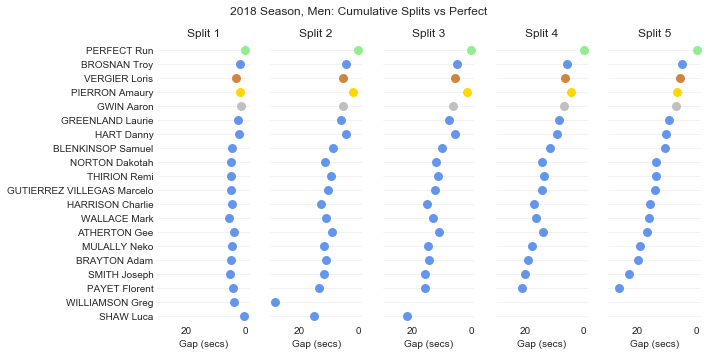

In [39]:
topX = 20

## Rearrange columns
data = data.sort_values( 'split5_t_rank' ).reset_index( drop=True )
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Colors
first = int(data.loc[data['points_t_rank'] == 2].index.values)
second = int(data.loc[data['points_t_rank'] == 3].index.values)
third = int(data.loc[data['points_t_rank'] == 4].index.values)
colors = colorList( '#6495ED', '#6495ED', len(data), first, second, third )
colors[0] = 'lightgreen'

# Make the PairGrid
g = sns.PairGrid( data[:topX], x_vars=['split1_t_vs_best', 'split2_t_vs_best', 'split3_t_vs_best', 'split4_t_vs_best', 'split5_t_vs_best'],
                 y_vars=["name"], size=5, aspect=.4 )

# Draw a dot plot using the stripplot function
# colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
# clrs = [ colors, colors, colors, colors, colors ]
# colors[0] = 'lightgreen'
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )

# (data[:topX]['split5_t_vs_best'].max()+1, -1.5)
# Use the same x axis limits on all columns and add better labels
g.set( xlim=(30,-1.5), xlabel="Gap (secs)", ylabel="" ) # xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = ["Split 1", "Split 2", "Split 3", "Split 4", "Split 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Cumulative Splits vs Perfect' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_cumulative_splits.png', dpi=dpi )

In [34]:
# data.points_t_rank.iloc[19] = 0

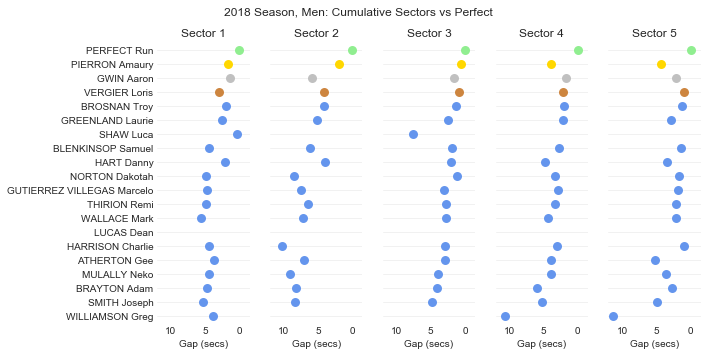

In [38]:
## Rearrange columns
# data['rank'] = data['split5_sector_t_rank']
data = data.sort_values( 'points_t_rank' ).reset_index( drop=True )
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Make the PairGrid
colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
colors[0] = 'lightgreen'
g = sns.PairGrid( data[:topX], x_vars=['split1_sector_t_vs_best', 'split2_sector_t_vs_best', 'split3_sector_t_vs_best', 'split4_sector_t_vs_best', 'split5_sector_t_vs_best'],
                 y_vars=["name"], size=5, aspect=.4 )

# Draw a dot plot using the stripplot function
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )

# (data[:topX]['split5_t_vs_best'].max()+1, -1.5)
# Use the same x axis limits on all columns and add better labels
g.set( xlim=(12,-1.5), xlabel="Gap (secs)", ylabel="" ) # xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = ["Sector 1", "Sector 2", "Sector 3", "Sector 4", "Sector 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Cumulative Sectors vs Perfect' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_cumulative_sectors.png', dpi=dpi )

---

In [40]:
if True:
    dfm.to_csv( file_prefix + '.season.csv' )
    data.to_csv( file_prefix + '.season.totals.csv' )
